In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Database detail
db = mysql.connector.connect(host = 'localhost',
                             user = 'root',
                             password = 'saminimi03',
                             database = 'ecommerce')

# Connect to database
cur = db.cursor()

# List all unique cities where customers are located

In [3]:
# MySQL query
query = """ select distinct customer_city from customers """

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of order placed in 2017

In [4]:
# MySQL query
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

data

[(45101,)]

In [5]:
data[0][0]

45101

# Find the total sales per category

In [11]:
# MySQL query
query = """ select products.product_category as category, sum(payments.payment_value) as sales
            from products join order_items on products.product_id = order_items.product_id
            join payments on payments.order_id = order_items.order_id
            group by category
        """
#Explaining the queries
# Line 1: Selecting product_category from produts table and sum of payments value from payments table
# Line 2: joining the tables of products and order_items on the basis of product_id
# Line 3: join payments with the joint table from Line 2 on the basis of order_id
# Line 4: grouping the same catagory values -> indicating what need to be summed

#Thorough Explanation
# sum operator always needs group_by/having clause to indicate what is need to be summed
# To do the task we need products.product_category and payments.payment_value
# But there was no common column between them !
# So we need the bridge table order_items which has at least one common column with both the tables

#Language Explanation
# Sum the payment values of same category from the joint table
# Used as to set a nick name


# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

data

[('perfumery', 506738.6598940939),
 ('Furniture Decoration', 1430176.3917766158),
 ('telephony', 486882.05071262456),
 ('bed table bath', 1712553.671003269),
 ('automotive', 852294.3311252594),
 ('computer accessories', 1585330.4462582897),
 ('housewares', 1094758.1302838866),
 ('babies', 539845.659735024),
 ('toys', 619037.6894793902),
 ('Furniture office', 646826.4871485233),
 ('Cool Stuff', 779698.0000486821),
 ('HEALTH BEAUTY', 1657373.1193935554),
 ('pet Shop', 311268.9703014195),
 ('General Interest Books', 64694.759615421295),
 ('stationary store', 317440.06965875626),
 ('Watches present', 1429216.6785924584),
 ('PCs', 279121.5493659973),
 ('climatization', 91170.65948677063),
 ('Construction Tools Construction', 241475.6302587986),
 ('sport leisure', 1392127.5591495223),
 ('Bags Accessories', 187151.29038503766),
 ('electronics', 259857.09967413358),
 ('Casa Construcao', 136645.29030653834),
 ('Games consoles', 195480.37912535667),
 ('Fashion Bags and Accessories', 218158.28002

In [26]:
# to eradicate the decimal values 
new_data = []
for item in data:
    new_data.append([item[0],round(item[1])])
new_data

[['perfumery', 506739],
 ['Furniture Decoration', 1430176],
 ['telephony', 486882],
 ['bed table bath', 1712554],
 ['automotive', 852294],
 ['computer accessories', 1585330],
 ['housewares', 1094758],
 ['babies', 539846],
 ['toys', 619038],
 ['Furniture office', 646826],
 ['Cool Stuff', 779698],
 ['HEALTH BEAUTY', 1657373],
 ['pet Shop', 311269],
 ['General Interest Books', 64695],
 ['stationary store', 317440],
 ['Watches present', 1429217],
 ['PCs', 279122],
 ['climatization', 91171],
 ['Construction Tools Construction', 241476],
 ['sport leisure', 1392128],
 ['Bags Accessories', 187151],
 ['electronics', 259857],
 ['Casa Construcao', 136645],
 ['Games consoles', 195480],
 ['Fashion Bags and Accessories', 218158],
 ['home appliances', 95532],
 ['Garden tools', 838281],
 ['Agro Industria e Comercio', 118731],
 [None, 252802],
 ['audio', 60325],
 ['technical books', 24915],
 ['Construction Tools Garden', 42394],
 ['Market Place', 45336],
 ['musical instruments', 233074],
 ['Drink foods

In [27]:
df = pd.DataFrame(new_data, columns=['category','sales'])
df

,category,sales
0,perfumery,506739
1,Furniture Decoration,1430176
2,telephony,486882
3,bed table bath,1712554
4,automotive,852294
...,...,...
69,cds music dvds,1199
70,La Cuisine,2914
71,Fashion Children's Clothing,786
72,PC Gamer,2174


# Calculate the percentage of orders that were paid in installments

In [35]:
# MySQL query
query = """ select count(order_id), payment_installments 
            from payments
            where payment_installments = 0 
         """
# To run the query
cur.execute(query)

# To fetch the data
data1 = cur.fetchall()

data1 = data1[0][0]
data1

2

In [36]:
# MySQL query
query = """
            select count(order_id)
            from payments
         """
# To run the query
cur.execute(query)

# To fetch the data
data2 = cur.fetchall()

data2 = data2[0][0]
data2

103886

In [43]:
print("The percentage of the orders that were paid in installments",round((1-(data1/data2))*100,3),"%")

The percentage of the orders that were paid in installments 99.998 %


## Other way ----->

In [46]:
# MySQL query
query = """ select sum(case 
                            when payment_installments >=1 then 1
                            else 0
                       end) / count(*) *100
            from payments 
         """

# Explanation
# this is like sum (1+ 0 + 1 + 1 + ......)
# Case Syntax
# case
#     when (condition) then (output)    ---> 1st case
#     when (condition) then (output)    ---> 2nd case
#     else                              ---> last case
# end


# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

data

[(Decimal('99.9981'),)]

# Count the number of customers from each state

In [3]:
# MySQL query
query = """ select customer_state, count(customer_id)
            from customers
            group by customer_state """

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

data

[('SP', 41746),
 ('SC', 3637),
 ('MG', 11635),
 ('PR', 5045),
 ('RJ', 12852),
 ('RS', 5466),
 ('PA', 975),
 ('GO', 2020),
 ('ES', 2033),
 ('BA', 3380),
 ('MA', 747),
 ('MS', 715),
 ('CE', 1336),
 ('DF', 2140),
 ('RN', 485),
 ('PE', 1652),
 ('MT', 907),
 ('AM', 148),
 ('AP', 68),
 ('AL', 413),
 ('RO', 253),
 ('PB', 536),
 ('TO', 280),
 ('PI', 495),
 ('AC', 81),
 ('SE', 350),
 ('RR', 46)]

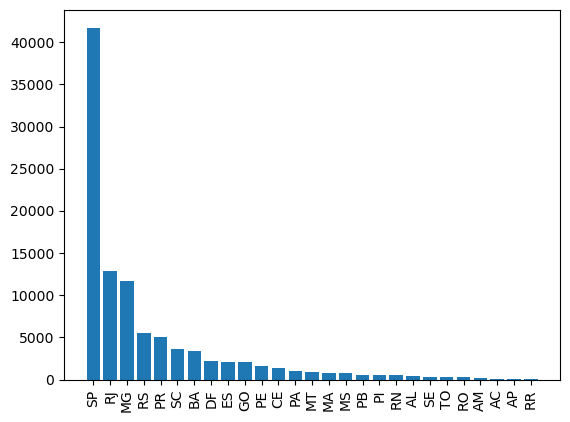

In [5]:
df = pd.DataFrame(data, columns=['State','Number of Customers'])
df = df.sort_values(by = "Number of Customers", ascending = False)
plt.bar(df['State'],df['Number of Customers'])
plt.xticks(rotation = 90)
plt.show()

# Calculate the number of orders per month in 2018

In [13]:
# MySQL query
query = """ select count(order_id), month(order_purchase_timestamp) as months from orders 
            where year(order_purchase_timestamp) = 2018 
            group by months
            order by months"""

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

data

[(7269, 1),
 (6728, 2),
 (7211, 3),
 (6939, 4),
 (6873, 5),
 (6167, 6),
 (6292, 7),
 (6512, 8),
 (16, 9),
 (4, 10)]

In [15]:
# MySQL query
query = """ SELECT months.month, IFNULL(COUNT(o.order_id), 0) AS total_orders
            FROM (
                SELECT 1 AS month UNION SELECT 2 UNION SELECT 3 UNION SELECT 4
                UNION SELECT 5 UNION SELECT 6 UNION SELECT 7 UNION SELECT 8
                UNION SELECT 9 UNION SELECT 10 UNION SELECT 11 UNION SELECT 12
                 ) AS months
            LEFT JOIN orders o 
            ON MONTH(o.order_purchase_timestamp) = months.month
            AND YEAR(o.order_purchase_timestamp) = 2018  -- Change the year as needed
            GROUP BY months.month
            ORDER BY months.month """

# This query is generated by chatGPT
# By uploading the orders.csv file and describing the problem statement

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

data

[(1, 7269),
 (2, 6728),
 (3, 7211),
 (4, 6939),
 (5, 6873),
 (6, 6167),
 (7, 6292),
 (8, 6512),
 (9, 16),
 (10, 4),
 (11, 0),
 (12, 0)]

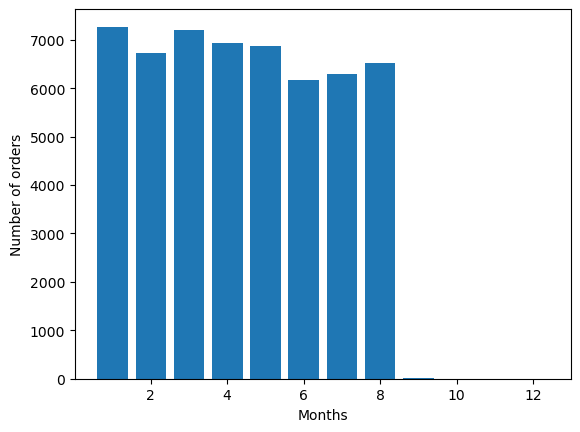

In [28]:
df = pd.DataFrame(data, columns=['months','orders'])
plt.bar(df['months'],df['orders'])
plt.xlabel("Months")
plt.ylabel("Number of orders")
plt.show()

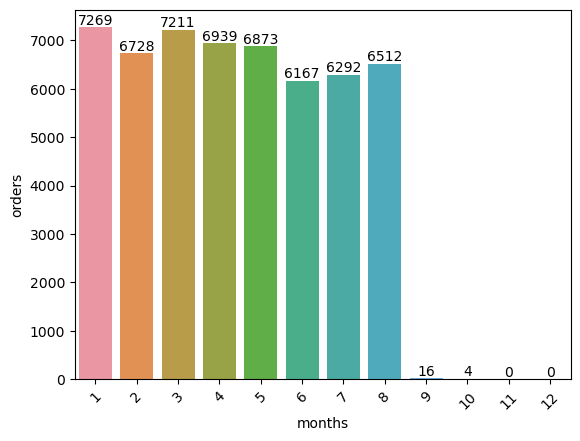

In [30]:
# Visualization with seaborn
ax = sns.barplot(x = df['months'], y=df['orders'], data=df)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

# Find the average number of products per order, grouped by customer city

In [31]:
# Understanding the difference between orders.order_id and order_items.order_id
# In orders table order_id cant be repeated.
# But in order_items table order_id might be repeated, This is because
# In a particular order, a customer can by more than one things
# In that case, in order_items table, for different different order_items_id there can be similar order_id

In [32]:
# MySQL query
query = """ with count_per_order as
                (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
                from orders join order_items
                on orders.order_id = order_items.order_id
                group by orders.order_id, orders.customer_id)

            select customers.customer_city, avg(count_per_order.oc) as avg_products
            from customers join count_per_order
            on customers.customer_id = count_per_order.customer_id
            group by customer_city"""

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

data

[('sao paulo', Decimal('1.1562')),
 ('sao jose dos campos', Decimal('1.1385')),
 ('porto alegre', Decimal('1.1749')),
 ('indaial', Decimal('1.1154')),
 ('treze tilias', Decimal('1.2727')),
 ('rio de janeiro', Decimal('1.1468')),
 ('mario campos', Decimal('1.3333')),
 ('guariba', Decimal('1.0000')),
 ('cuiaba', Decimal('1.1976')),
 ('franca', Decimal('1.2516')),
 ('tocos', Decimal('1.0000')),
 ('januaria', Decimal('1.1818')),
 ('campinas', Decimal('1.1575')),
 ('embu-guacu', Decimal('1.2391')),
 ('cerquilho', Decimal('1.1667')),
 ('belo horizonte', Decimal('1.1433')),
 ('taubate', Decimal('1.1348')),
 ('arcos', Decimal('1.1200')),
 ('monte mor', Decimal('1.0769')),
 ('vianopolis', Decimal('1.3333')),
 ('cacapava', Decimal('1.1622')),
 ('sao jose da tapera', Decimal('1.0000')),
 ('belford roxo', Decimal('1.0901')),
 ('pedro leopoldo', Decimal('1.2500')),
 ('arroio do sal', Decimal('1.2857')),
 ('sao bernardo do campo', Decimal('1.1422')),
 ('brasilia', Decimal('1.1304')),
 ('ribeirao pir

In [34]:
df = pd.DataFrame(data, columns = ['City','Avg_products/order'])
df = df.sort_values(by = "Avg_products/order", ascending = False)
df.head(10)

,City,Avg_products/order
3574,padre carvalho,7.0000
1255,celso ramos,6.5000
3120,datas,6.0000
3717,candido godoi,6.0000
3863,matias olimpio,5.0000
2912,teixeira soares,4.0000
2717,morro de sao paulo,4.0000
3045,curralinho,4.0000
3841,cidelandia,4.0000
3910,picarra,4.0000


# Calculate the percentage of total revenue contributed by each product category

In [79]:
# MySQL query
query = """ select product_category, round(sum(payment_value)/(select sum(payment_value) from payments) * 100,2) as sc
            from products join order_items
            on products.product_id = order_items.product_id
            join payments
            on payments.order_id = order_items.order_id
            group by product_category
            order by sc desc """

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

df = pd.DataFrame(data, columns = ['product_category','Contribution_percentage'])
df

,product_category,Contribution_percentage
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
...,...,...
69,House Comfort 2,0.01
70,cds music dvds,0.01
71,PC Gamer,0.01
72,Fashion Children's Clothing,0.00


array([<Axes: >], dtype=object)

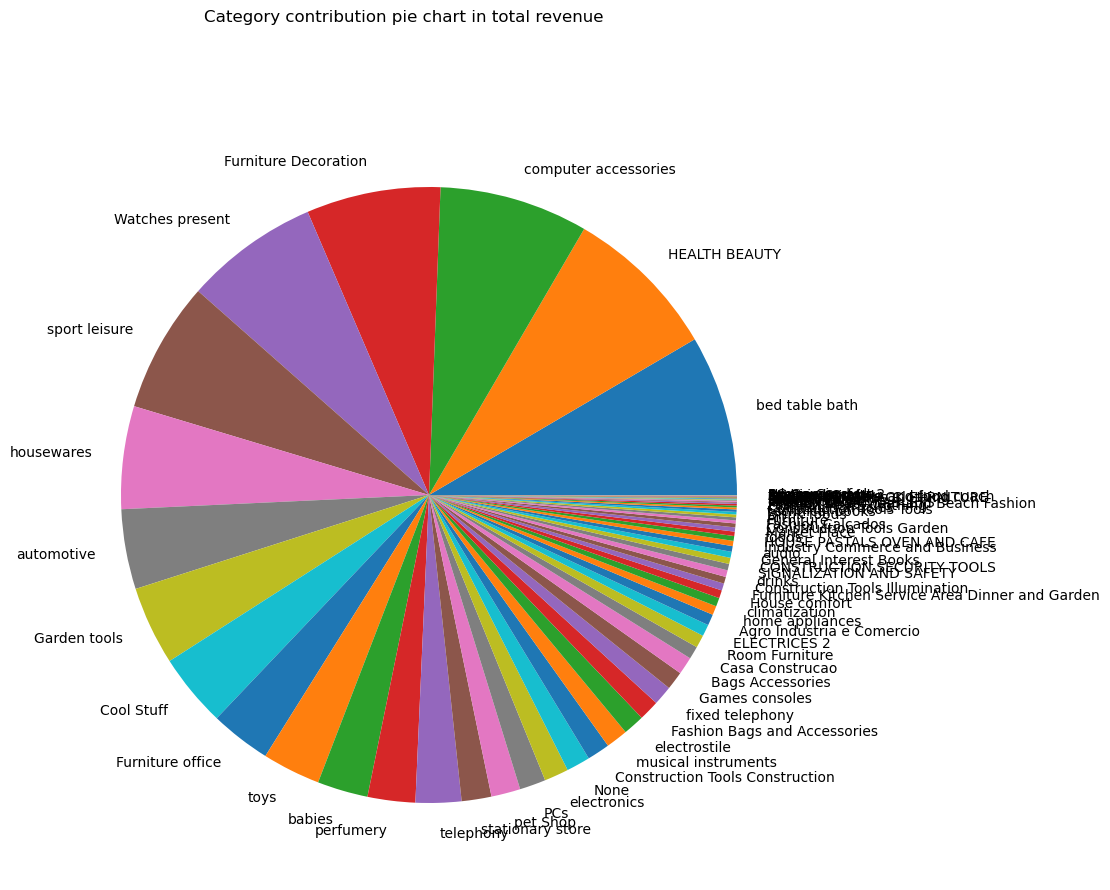

In [80]:
df.set_index('product_category').plot.pie(subplots=True, figsize=(20, 10), legend=False, 
                                          title='Category contribution pie chart in total revenue',
                                          ylabel='')

In [81]:
# manifesting the top 10 categories in the pie chart
# the rest will be in the others category

# Since the data is already sorted in descending
# deleting the last 65 (64) rows out of 75 (74) rows 
df = df.drop(df.index[10:74])
df

,product_category,Contribution_percentage
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
5,sport leisure,8.70
6,housewares,6.84
7,automotive,5.32
8,Garden tools,5.24
9,Cool Stuff,4.87


In [82]:
top_10 = 0

# Counting the cntribution of Top 10
for i in df['Contribution_percentage']:
    top_10 = i + top_10

# Counting the conribution of others
others = 100 - top_10

# Adding a new row called others in df dataframe
df.loc[len(df)] = ["Others", others]

df

,product_category,Contribution_percentage
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
5,sport leisure,8.70
6,housewares,6.84
7,automotive,5.32
8,Garden tools,5.24
9,Cool Stuff,4.87


array([<Axes: >], dtype=object)

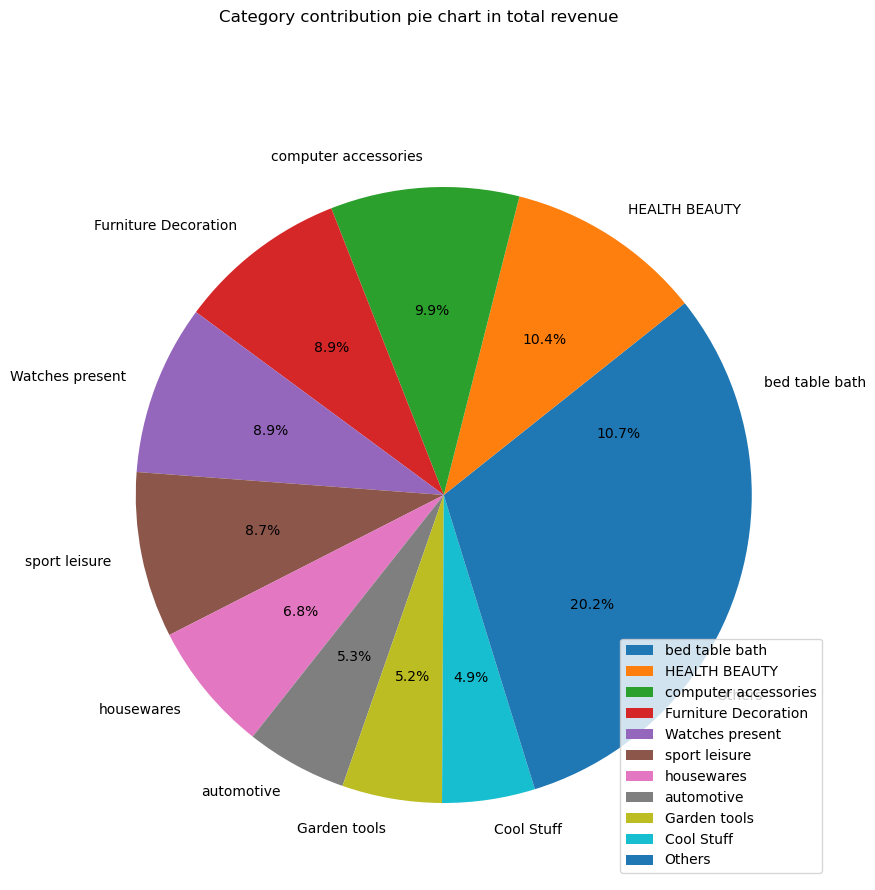

In [85]:
df.set_index('product_category').plot.pie(subplots=True, figsize=(20, 10),  ylabel='', autopct='%1.1f%%',
                                          title='Category contribution pie chart in total revenue')

# Identify the correlation between product category price and the number of times a product has been purchased

In [3]:
# Here product category price means
# average price of products of each category

In [4]:
# MySQL query
query = """ select product_category, count(order_items.product_id), round(avg(price),2)
            from products join order_items
            on products.product_id = order_items.product_id
            group by product_category """

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

df = pd.DataFrame(data, columns = ['product_category','order_count','average_price'])
df

,product_category,order_count,average_price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


In [5]:
# Find the correlation coefficient
import numpy as np
np.corrcoef(df['order_count'],df['average_price'])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

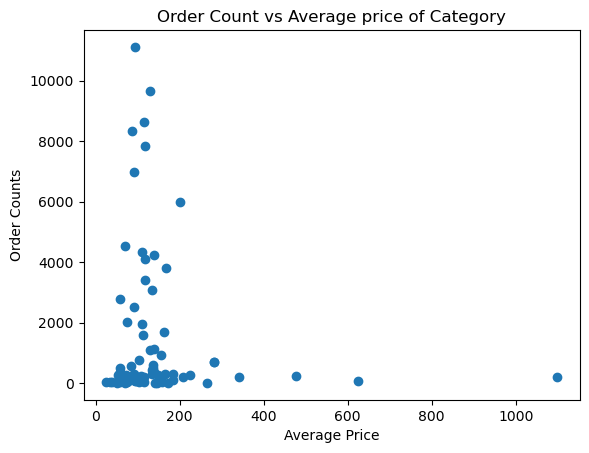

In [10]:
# Exloring the correlation by scatter plot
plt.title('Order Count vs Average price of Category')
plt.scatter(df['average_price'],df['order_count'])
plt.xlabel('Average Price')
plt.ylabel('Order Counts')
plt.show()

# Calculate the total revenue generated by each seller, and rank them by revenue

In [28]:
# MySQL query
query = """ select seller_id, round(sum(payment_value),2) as revenue
            from order_items join payments
            on order_items.order_id = payments.order_id
            group by seller_id
            order by revenue desc """
# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Seller ID','Total Revenue'])

rank = []

for i in range(1,3096):
    rank.append(i)

df['Rank'] = rank
df

,Seller ID,Total Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,3091
3091,702835e4b785b67a084280efca355756,18.56,3092
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,3093
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,3094


# Other way -->

In [4]:
# MySQL query
query = """ select *, dense_rank() over(order by revenue desc) from
            (select seller_id, round(sum(payment_value),2) as revenue
            from order_items join payments
            on order_items.order_id = payments.order_id
            group by seller_id) as a """

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Seller ID','Total Revenue','Rank'])

In [5]:
df

,Seller ID,Total Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,3076
3091,702835e4b785b67a084280efca355756,18.56,3077
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,3078
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,3079


# Calculate the moving average of order values for each customer over their order history (for past 3 orders)

In [3]:
# MySQL query
query = """ select customer_id, order_purchase_timestamp, payment_value, avg(payment_value)
            over( partition by customer_id order by order_purchase_timestamp
            rows between 2 preceding and current row) as mov_avg
            from
            (select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value
            from orders join payments
            on orders.order_id = payments.order_id) as a"""

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

df = pd.DataFrame(data, columns=['customer_id', 'order_purchase_timestamp', 'payment value','Moving Average'])
df

,customer_id,order_purchase_timestamp,payment value,Moving Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year

In [4]:
# MySQL query
query = """ select years, months, payment, sum(payment) over(order by years,months) as cumulative_sales from
            (select year(orders.order_purchase_timestamp) as years, month(orders.order_purchase_timestamp) as months,
            round(sum(payments.payment_value),2) as payment
            from orders join payments
            on orders.order_id = payments.order_id
            group by years,months order by years,months) as a"""

## group by yeras,months --> group by months of each year
## order by years,months --> first order by year, than order by months
## over(order by) --> consider the current and previous rows
## over () --> consider all rows
## over (partition by) --> works as group by in over() clause

# To run the query
cur.execute(query)

# To fetch the data
data = cur.fetchall()

df = pd.DataFrame(data, columns=['Year', 'month', 'Total sale','Cumulative sale'])
df

,Year,month,Total sale,Cumulative sale
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales